In [97]:
from skimage.measure import label
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import filters
import math

# Part A: Preprocessing for region extraction
## Load and confirm images

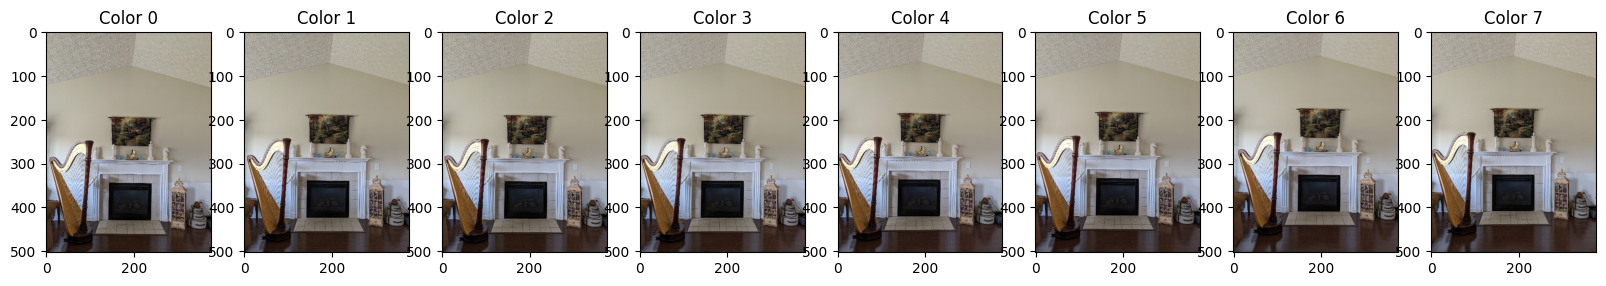

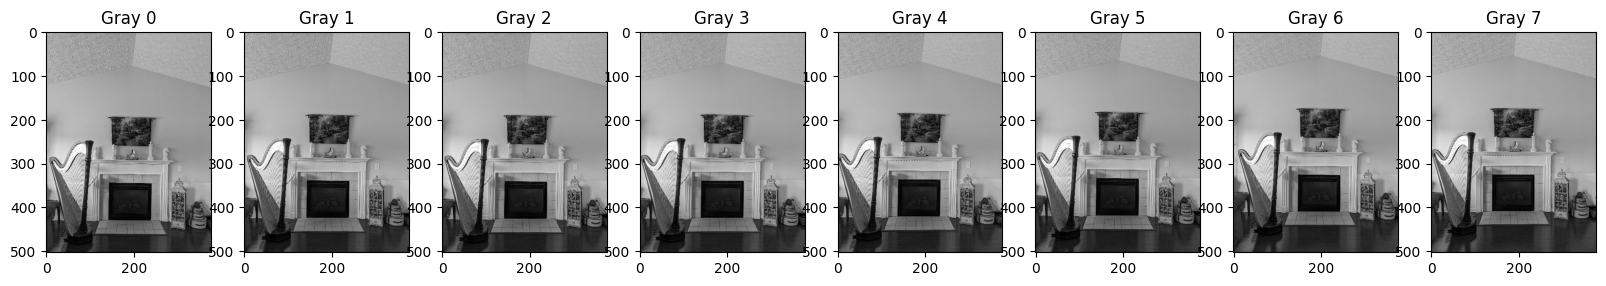

In [98]:
##Confirm image size usable
#N=3, R=4025, C=3017
#4025 = Q*8+1, Q=503
#3017 = M*8+1, M=377

# Import Images
imageList=[]
for i in range(8):
    imageList.append('./images/im%d.jpg' % i)
colorImages = []
grayscaleImages = []
for imageFile in imageList:
    # Import
    image = io.imread(imageFile)
    gray = io.imread(imageFile, as_gray=True)
    
    #Store
    colorImages.append(image)
    grayscaleImages.append(gray)


i=0
fig,axs = plt.subplots(1,8,figsize=(20,10))
for image in colorImages:

    axs[i].imshow(image) 
    axs[i].set_title("Color {}".format(i))
    i+=1   
plt.show()

i=0  
fig,axs = plt.subplots(1,8,figsize=(20,10))
for image in grayscaleImages:
    axs[i].imshow(image, cmap="gray") 
    axs[i].set_title("Gray {}".format(i))
    i+=1
plt.show()


## Note: tried to manually reduce original images, was very computationally expensive and bug riddled. Used online tool instead then uploaded shrunk images.

## Step 2: Construct MEI

(503, 377)
(8, 503, 377)


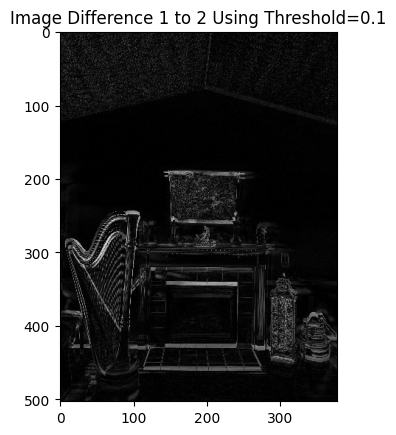

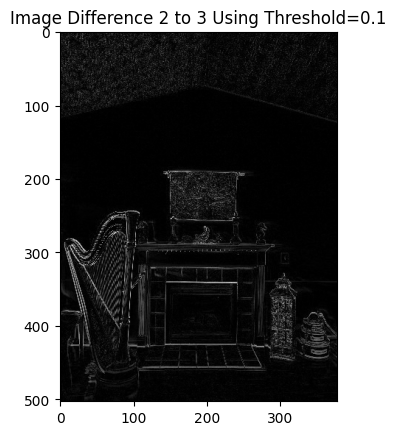

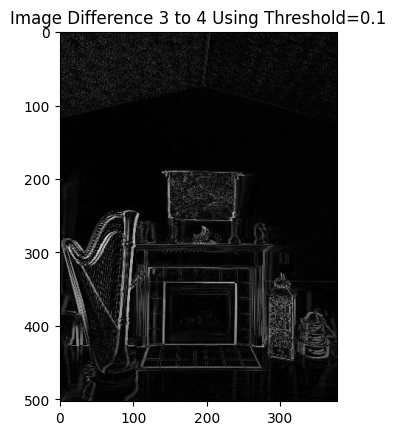

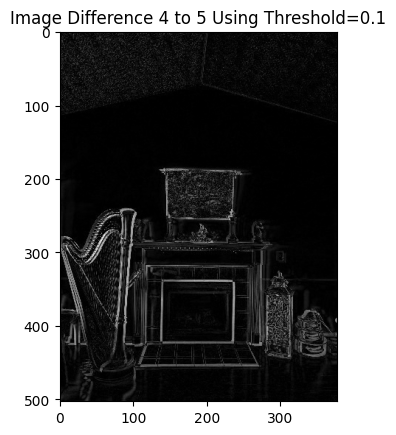

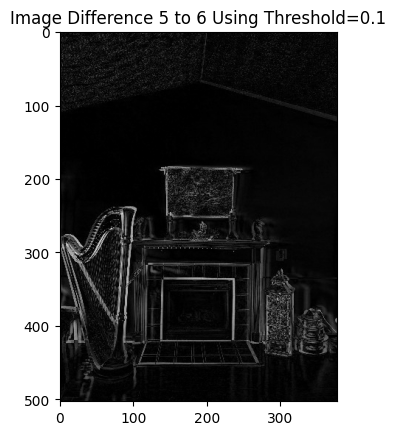

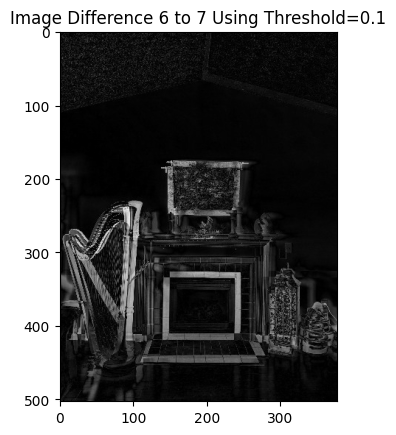

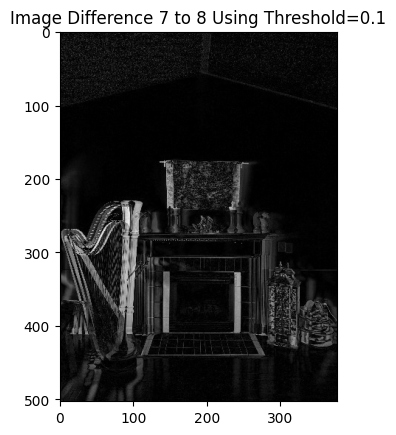

1.0


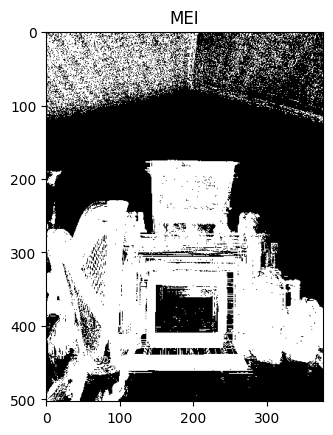

In [99]:
## Get images in numpy array for MEI construction
print(np.shape(grayscaleImages[0]))
images = np.zeros((8,np.shape(grayscaleImages[0])[0],np.shape(grayscaleImages[0])[1]))
for i in range(8):
    images[i] = grayscaleImages[i]
print(np.shape(images))



motionEnergyImage = np.zeros(np.shape(grayscaleImages[0]))

# Note: Thresholding took some work to find useful information
threshold = .1
for i in range(1,8):
    imDif = abs(images[i,:,:]-images[i-1,:,:])
    imShape = np.shape(imDif)
    for row in range(imShape[0]):
        for column in range(imShape[1]):
            if imDif[row,column] > threshold:
                motionEnergyImage[row,column]=1
          
    plt.figure()
    plt.imshow(imDif, cmap='gray') 
    plt.title("Image Difference {} to {} Using Threshold={}".format(i,i+1,threshold))
    plt.show()

print(np.max(motionEnergyImage))

plt.figure()
plt.imshow(motionEnergyImage, cmap='gray') 
plt.title("MEI")
plt.show()

# Part B: Region Extraction
## Step 1: Get all of the Regions and Display them

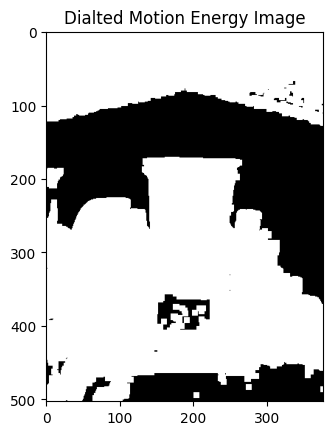

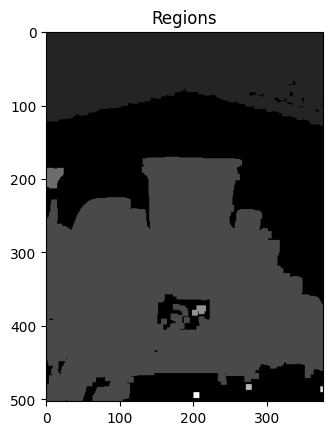

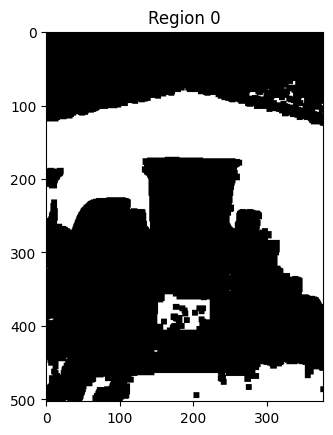

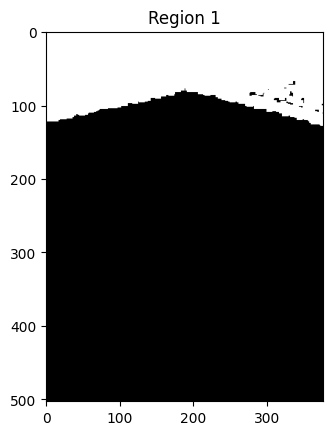

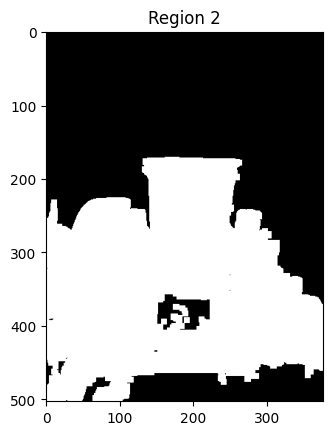

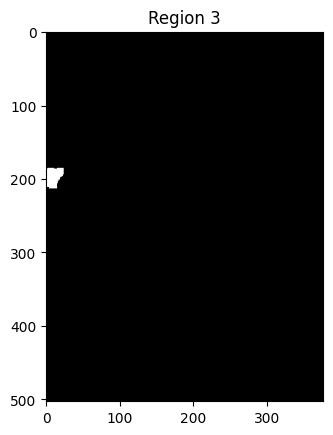

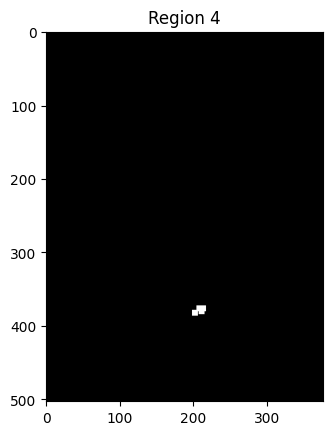

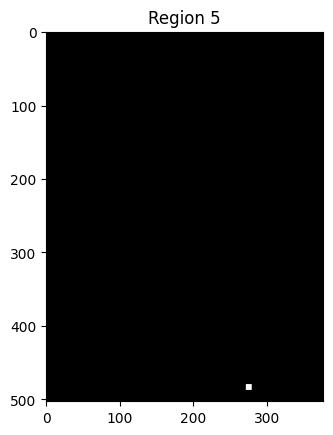

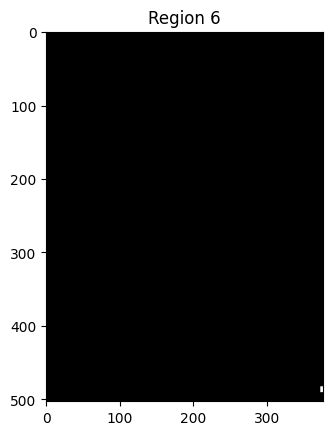

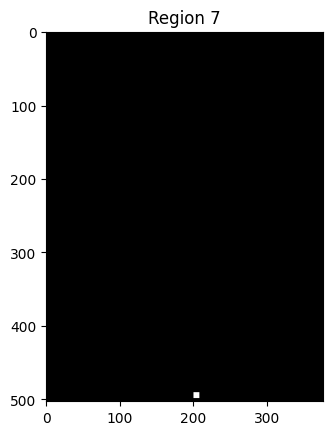

In [100]:
dilated_im = ndimage.binary_dilation(motionEnergyImage, structure=np.ones((8,8)))

plt.imshow(dilated_im, cmap='gray')
plt.axis("image")
plt.title("Dialted Motion Energy Image")
plt.show()

labels = label(dilated_im, connectivity=1)

plt.imshow(labels, cmap='gray')
plt.axis("image")
plt.title("Regions")
plt.show()

regions = np.unique(labels)

for i in range(len(regions)):
    region = labels == i
    plt.imshow(region, cmap='gray')
    plt.axis("image")
    plt.title("Region {}".format(i))
    plt.show()

## Step 2: Select the region and return the coordinates of points that lie within the region

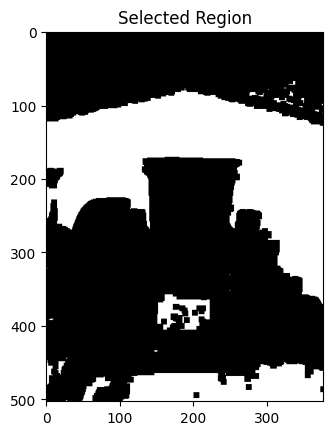

In [101]:
selectedRegion = labels == 0

plt.imshow(selectedRegion, cmap='gray')
plt.axis("image")
plt.title("Selected Region")
plt.show()

wallCoordinates = []

height, width = region.shape

for y in range(int(height)):
    for x in range(int(width)):
        if (selectedRegion[y, x]):
            wallCoordinates.append((x, y))

# Part C
## Replace the color value at region's coordinates

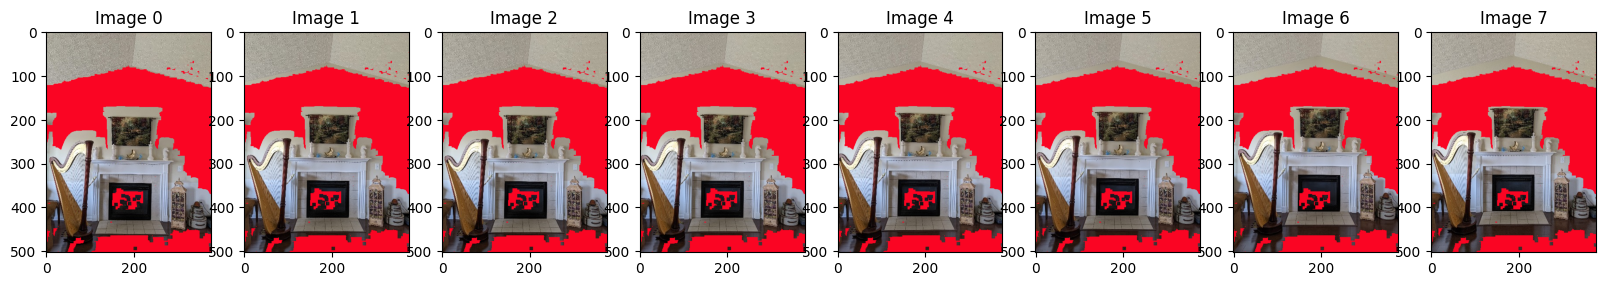

In [102]:
color = [250, 5, 35]

fig,axs = plt.subplots(1,8,figsize=(20,10))
counter = 0 
for image in colorImages:
    for i in range(len(wallCoordinates)):
        x, y = wallCoordinates[i]

        image[y, x] = color

    axs[counter].imshow(image) 
    axs[counter].set_title("Image {}".format(counter))
    counter += 1   
plt.show()